<a href="https://colab.research.google.com/github/Logeshwari-2001/Anomaly/blob/main/Copy_of_Anomaly_data_breach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.5.3
numpy : 1.22.4
matplotlib : 3.7.1
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.10.1
pandas : 1.5.3
numpy : 1.22.4
matplotlib : 3.7.1
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.10.1


DATASET

In [ ]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
train = pd.read_csv("/content/KDDTrain.csv", names=datacols) # change path to where the dataset is located.
#eliminating the unwanted extra field
train = train.iloc[:,:-1]

In [ ]:
duration_values = train["duration"].values

# Calculate the mean of the duration column
mean_duration = duration_values.mean()

print("Mean duration:", mean_duration)

Mean duration: 287.1446500440571


In [ ]:
std_dev = np.sqrt(sum((x - mean_duration)**2 for x in train["duration"].values) / (len(train["duration"]) - 1))
print(std_dev)

2604.5153098675246


In [ ]:
for x in train["duration"].values:
  num=x-mean_duration
  scaled_values=num/std_dev
  print(scaled_values)

Streaming output truncated to the last 5000 lines.
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.1083290426341967
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
0.5969845306975864
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.10948088842624641
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.1087129912315466
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
0.047938036487216326
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024878562094624
-0.11024

In [ ]:
print(duration_scaled)

[-0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, 2.042550999719994, -0.11024878562094624, 0.08441315323545769, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.10986483702359633, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.11024878562094624, -0.10948088842624641, 3.365253917590431, -0.11024878562094624, -0.1102487856209

VIEWING THE TRAIN DATA AND DIMENSION

In [ ]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [ ]:
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

Training data has 125973 rows & 42 columns


VIEWING TEST DATA AND DIMENSION

DATA PREPROCESSING Mapping which means we are considering four types of attacks(dos,u2r,r2l,probe) and then we are having many types under these categories mapping is the process which map these numerous attacks to their respective prime attack fields.

In [ ]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [ ]:
train['attack'] = train['attack'].apply(lambda v: mapping[v])

dropping attack field(i.e replacing the sub attacks with the prime attack names)sub attack->neptune which is replaced by its respective prime attack dos.

In [ ]:
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,DoS


In [ ]:
print("hi")

hi


STATISTICS

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


REMOVING THE UNNECESSARY FIELDS FROM THE DATASET

In [ ]:
train['attack'].value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

In [ ]:
attack_class_freq_train = train[['attack']].apply(lambda x: x.value_counts())

attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_dist = pd.concat([attack_class_freq_train], axis=1) 
attack_class_dist

,attack,frequency_percent_train
Normal,67343,53.46
DoS,45927,36.46
Probe,11656,9.25
R2L,995,0.79
U2R,52,0.04


SCALING NUMERICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))


# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)


In [ ]:
print(sc_traindf)

        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
...          ...        ...        ...       ...             ...       ...   
125968 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125969 -0.107178  -0.007744  -0.004883 -0.014089       -0.089486 -0.007736   
125970 -0.110249  -0.007382  -0.004823 -0.014089       -0.089486 -0.007736   
125971 -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
125972 -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   

             hot  num_failed_logins  logged_in  num_compromised

ENCODING CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack'], axis=1)
cat_Ytrain = traincat[['attack']].copy()

In [ ]:
traincat.head(3)

,protocol_type,service,flag,attack
0,1,20,9,1
1,2,44,9,1
2,1,49,5,0


In [ ]:
print(enctrain)
print(cat_Ytrain)

        protocol_type  service  flag
0                   1       20     9
1                   2       44     9
2                   1       49     5
3                   1       24     9
4                   1       24     9
...               ...      ...   ...
125968              1       49     5
125969              2       49     9
125970              1       54     9
125971              1       30     5
125972              1       20     9

[125973 rows x 3 columns]
        attack
0            1
1            1
2            0
3            1
4            1
...        ...
125968       0
125969       1
125970       1
125971       0
125972       1

[125973 rows x 1 columns]


In [ ]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['attack']
train_x.shape


(125973, 41)

In [ ]:
train_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,20,9
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2,44,9
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1,49,5
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,24,9
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1,49,5
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2,49,9
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,54,9
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.523041,-0.

In [ ]:
train_y
y=train.attack

In [ ]:
#split the training data set into train dataset and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.2, random_state=42)

In [ ]:
accuracy_dict = {}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
for feature in X_train.columns:
    # Fit a logistic regression model using cross-validation to choose the optimal hyperparameters
    
    svm_model = SVC(kernel='linear', C=10, gamma=0.1,random_state=0)
    scores = cross_val_score(svm_model, X_train[[feature]], y_train, cv=5)
    accuracy = scores.mean()
    # Evaluate the performance of the model on the validation set
    svm_model.fit(X_train[[feature]], y_train)
    y_pred = svm_model.predict(X_test[[feature]])
    accuracy_dict[feature] = accuracy_score(y_test, y_pred)

# Print the accuracy scores for each feature
for feature, accuracy in accuracy_dict.items():
    print(feature, ':', accuracy)

In [ ]:
print("hi")

hi


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
for feature in X_train.columns:
    # Fit a logistic regression model using cross-validation to choose the optimal hyperparameters
    clf = LogisticRegression(random_state=42, max_iter=500)
    scores = cross_val_score(clf, X_train[[feature]], y_train, cv=5)
    accuracy = scores.mean()
    # Evaluate the performance of the model on the validation set
    clf.fit(X_train[[feature]], y_train)
    y_pred = clf.predict(X_train[[feature]])
    accuracy_dict[feature] = accuracy_score(y_train, y_pred)

# Print the accuracy scores for each feature
for feature, accuracy in accuracy_dict.items():
    print(feature, ':', accuracy)

duration : 0.5397408164480343
src_bytes : 0.5350870229613606
dst_bytes : 0.5350771001607494
land : 0.5351465597650281
wrong_fragment : 0.5436007858858084
urgent : 0.5350374089583044
hot : 0.5350076405564707
num_failed_logins : 0.534898489749747
logged_in : 0.7367778681855167
num_compromised : 0.5350473317589156
root_shell : 0.5350473317589156
su_attempted : 0.5350473317589156
num_root : 0.5350473317589156
num_file_creations : 0.5350473317589156
num_shells : 0.5350671773601381
num_access_files : 0.5350473317589156
num_outbound_cmds : 0.5350473317589156
is_host_login : 0.5350473317589156
is_guest_login : 0.5350473317589156
count : 0.7906487527039632
srv_count : 0.5447815991585465
serror_rate : 0.7989839052174086
srv_serror_rate : 0.7996288872571394
rerror_rate : 0.5661156204727222
srv_rerror_rate : 0.566552223699617
same_srv_rate : 0.8347853698227787
diff_srv_rate : 0.5415666117605032
srv_diff_host_rate : 0.5350473317589156
dst_host_count : 0.6578916033261227
dst_host_srv_count : 0.77218

In [ ]:
print("hi")

FEATURE SELECTION USING RANDOM FOREST CLASSIFIER

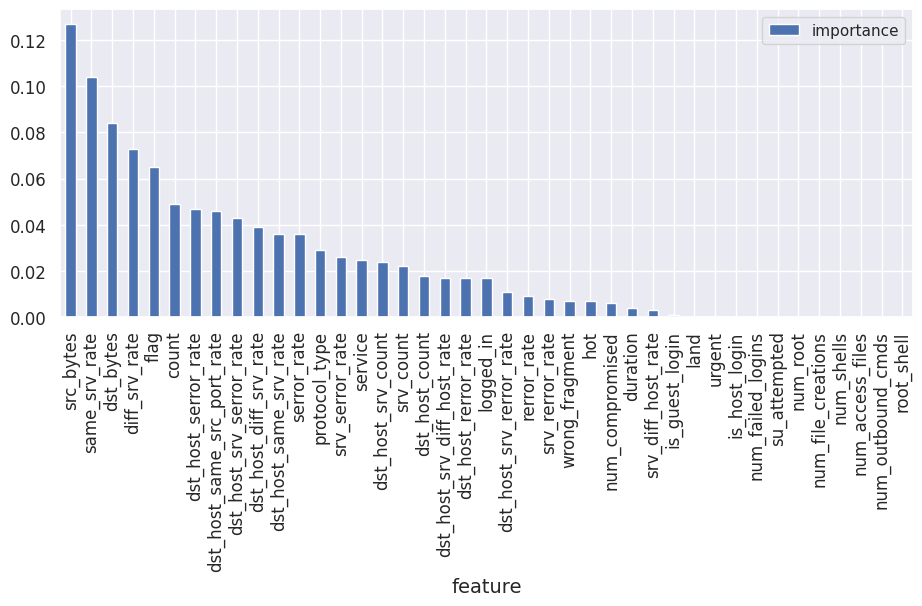

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'protocol_type',
 'service',
 'flag']

In [ ]:
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_test, y_test)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_test.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
print(selected_features)

['src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'protocol_type', 'flag']


In [ ]:
X_train_rfe = rfe.transform(X_train)

In [ ]:
X_test_rfe = rfe.transform(X_test)

#TRAINING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.svm import OneClassSVM

# instantiate the model (using the default parameters)

svm_model = SVC(kernel='linear', C=10, gamma=0.1,random_state=0)
svm_model.fit(X_train_rfe, y_train)

logreg = LogisticRegression(n_jobs=-1,random_state=0)
logreg.fit(X_train_rfe, y_train)



LogisticRegression(n_jobs=-1, random_state=0)

In [ ]:
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Print the values of w and b
print("w: ", w)
print("b: ", b)

w:  [-4.646e-02 -6.421e+00  3.268e+00 -1.826e+00  8.500e-02  1.017e-01
 -1.036e-01 -4.055e-03  2.744e-02  2.317e-02  8.200e-02  8.975e-01
 -7.983e-01 -2.129e-03 -1.377e-02]
b:  2.0535751238213193


In [ ]:
y_pred = svm_model.predict(X_train_rfe)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)

[[ 9146    16    19     0     0]
 [13040   314    68     0     0]
 [ 1275   514   567     1     0]
 [  214    10     0     0     0]
 [   11     0     0     0     0]]


In [ ]:
cm = confusion_matrix(y_train, y_pred)
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]
print("True negatives (TN):", tn)
print("False positives (FP):", fp)
print("False negatives (FN):", fn)
print("True positives (TP):", tp)

True negatives (TN): 9146
False positives (FP): 16
False negatives (FN): 13040
True positives (TP): 314


In [ ]:
print("True negatives (TN):", tn)
print("False positives (FP):", fp)
print("False negatives (FN):", fn)
print("True positives (TP):", tp)

True negatives (TN): 34960
False positives (FP): 1610
False negatives (FN): 380
True positives (TP): 52802


In [ ]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
print(Accuracy)

0.42014567418724463


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_binary = [1 if x == 1 else -1 for x in y_pred]

# Calculate the confusion matrix
y_true = [1 if x == 'normal' else -1 for x in X_train_rfe['label']]
cm = confusion_matrix(y_true, y_pred_binary)
print(cm)

IndexError: ignored

In [ ]:
w1, w2 = svm_model.coef_[0]
b = svm_model.intercept_

ValueError: ignored

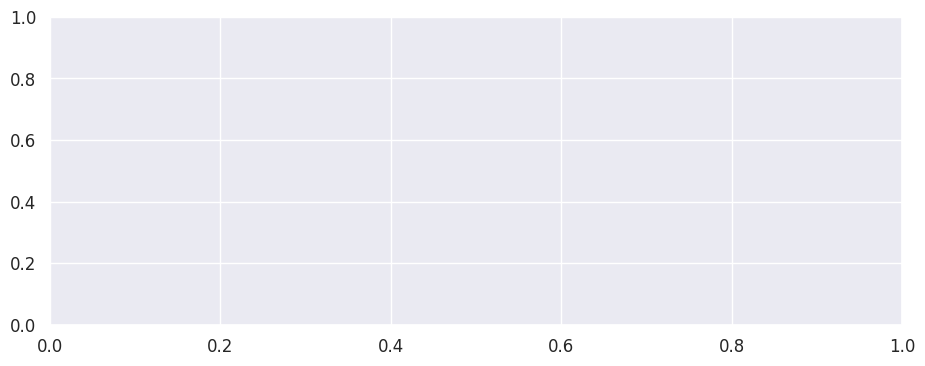

In [ ]:
plt.scatter(X_train_rfe[:, 0], X_train_rfe[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.show()

SAVE THE MODEL


In [ ]:
import pickle
with open('svm_model1.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_train_pred = svm_model.predict(X_train_rfe)
accuracy_svm = accuracy_score(y, y_train_pred)
cm_train = metrics.confusion_matrix(y, y_train_pred)

In [ ]:
print(cm_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_train_pred = logreg.predict(X_train_rfe)
accuracy_logreg = accuracy_score(y, y_train_pred)
cm = metrics.confusion_matrix(y, y_train_pred)
print(cm)

ACCURACY

In [ ]:
accuracy_svm = accuracy_score(y, y_train_pred)
print("Accuracy of SVM",accuracy_svm)
print("Accuracy of Logistic Regression",accuracy_logreg)